<a href="https://colab.research.google.com/github/Rp2451/practice-projects/blob/main/04-Data-Wrangling/Non-Guided-Project/NG04_Public_Health_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-Guided Project 4: Public Health Data Preparation
## Chapter 4: Data Wrangling and Preparation

**AI Thinking: A Hands-On Introduction to Artificial Intelligence**

---

### Scenario

You're volunteering with a community health nonprofit in Miami-Dade County. They've been collecting data on patient visits across several neighborhood clinics, but the data has quality issues. Before the nonprofit can present findings to the county health board, the data needs to be cleaned and summarized.

Your job: **Clean this dataset and prepare a summary of key findings.**

---

### What You'll Practice
- Loading and exploring a dataset
- Finding and handling missing values
- Removing duplicates
- Standardizing inconsistent text
- Filtering out invalid data
- Basic analysis using groupby and value_counts

### Dataset Columns
| Column | Description |
|--------|-------------|
| visit_id | Unique ID for each visit |
| zip_code | Clinic zip code |
| neighborhood | Clinic neighborhood |
| visit_type | Type of visit (e.g., Flu Vaccination, Dental Cleaning) |
| age_group | Patient age range |
| gender | Patient gender |
| insurance_type | Insurance category |
| preferred_language | Patient's preferred language |
| wait_time_minutes | How long the patient waited |
| satisfaction_score | Patient satisfaction (1-5 scale) |
| follow_up_needed | Whether a follow-up visit is needed (Yes/No) |

---
## Part 1: Load and Explore the Data

Import pandas, load the CSV file, and explore the dataset using the methods from the guided project:
- `.head()`
- `.shape`
- `.info()`
- `.describe()`

In [1]:
# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv('community_health_visits.csv')

# View the first few rows
df.head()

,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
0,5030,33132,Downtown Miami,COVID Vaccination,26-35,Non-Binary,PRIVATE,Spanish,60.0,5.0,Yes
1,5065,33139,Miami Beach,MENTAL HEALTH CONSULTATION,26-35,Male,Uninsured,Spanish,79.0,3.0,Yes
2,5064,33145,Coral Way,Vision Screening,18-25,Male,Medicare,English,90.0,1.0,Yes
3,5053,33132,Downtown Miami,Diabetes Screening,65+,Male,uninsured,Spanish,55.0,2.0,No
4,5045,33130,Brickell,Dental Cleaning,26-35,Male,Private,English,480.0,3.0,Yes


In [2]:
# Check the shape of the dataset
# YOUR CODE HERE
df.shape

(104, 11)

In [3]:
# Run .info() to see column types and non-null counts
# YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visit_id            104 non-null    int64  
 1   zip_code            104 non-null    int64  
 2   neighborhood        98 non-null     object 
 3   visit_type          104 non-null    object 
 4   age_group           104 non-null    object 
 5   gender              104 non-null    object 
 6   insurance_type      99 non-null     object 
 7   preferred_language  101 non-null    object 
 8   wait_time_minutes   100 non-null    float64
 9   satisfaction_score  94 non-null     float64
 10  follow_up_needed    104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


In [4]:
# Run .describe() to see statistics for numerical columns
# YOUR CODE HERE
df.describe()

,visit_id,zip_code,wait_time_minutes,satisfaction_score
count,104.000000,104.000000,100.000000,94.000000
mean,5049.221154,33099.230769,52.050000,3.680851
std,28.972688,57.941757,50.366811,1.415830
min,5000.000000,33010.000000,-15.000000,0.000000
25%,5024.750000,33012.000000,23.750000,3.000000
50%,5049.500000,33132.000000,54.000000,4.000000
75%,5074.250000,33139.000000,66.000000,5.000000
max,5099.000000,33155.000000,480.000000,8.000000


### ✏️ Your Observations

Before moving on, write down what you notice. Double-click this cell to edit.

- How many rows and columns does the dataset have?
- Which columns appear to have missing values?
- Do any of the min/max values in `.describe()` look suspicious?
- Anything else that looks off?

*Your notes:*



We have negative values for wait time, which wouldn't apply situationally here. A minumum or maximum , or any other variation of a zip code isn't really useful information, just because the numbers in zip codes aren't really meant to me measured like that.

---
## Part 2: Find Missing Values

Count the missing values in each column. Then calculate the percentage of missing values.

**Hint:** You did this in the guided project with `.isnull().sum()`

In [5]:
# Count missing values per column
# YOUR CODE HERE
df.isnull().sum()

,0
visit_id,0
zip_code,0
neighborhood,6
visit_type,0
age_group,0
gender,0
insurance_type,5
preferred_language,3
wait_time_minutes,4
satisfaction_score,10


28 total missing values

In [6]:
# Calculate missing value percentages
# Hint: (df.isnull().sum() / len(df) * 100).round(1)
# YOUR CODE HERE
df.isnull().sum() / len(df) * 100

,0
visit_id,0.000000
zip_code,0.000000
neighborhood,5.769231
visit_type,0.000000
age_group,0.000000
gender,0.000000
insurance_type,4.807692
preferred_language,2.884615
wait_time_minutes,3.846154
satisfaction_score,9.615385


highest missing percentage is satisfaction_score with ~9.6% , so not too bad.

---
## Part 3: Handle Missing Values

Decide how to handle each column with missing data. Here's a guide:

| Column | Suggested Strategy |
|--------|-------------------|
| neighborhood | Fill with `'Unknown'` |
| insurance_type | Fill with `'Unknown'` |
| preferred_language | Fill with `'Unknown'` |
| wait_time_minutes | Fill with the **median** |
| satisfaction_score | Fill with the **median** |

Use `.fillna()` for each column.

In [7]:
# Fill missing text columns with 'Unknown'
# YOUR CODE HERE
df.fillna('Unknown', inplace=True)

/tmp/ipython-input-668/920163707.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


In [8]:
import numpy as np

# Columns that should be numerical and filled with median
numerical_cols_to_fill_median = ['wait_time_minutes', 'satisfaction_score']

for col in numerical_cols_to_fill_median:
    # Convert 'Unknown' (if present) to NaN, then convert to numeric
    # This addresses the issue caused by the previous df.fillna('Unknown')
    df[col] = df[col].replace('Unknown', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce') # Ensure they are numeric

    # Calculate median
    median_val = df[col].median()

    # Fill NaN values with the median
    df[col].fillna(median_val, inplace=True)

# Display info to verify
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visit_id            104 non-null    int64  
 1   zip_code            104 non-null    int64  
 2   neighborhood        104 non-null    object 
 3   visit_type          104 non-null    object 
 4   age_group           104 non-null    object 
 5   gender              104 non-null    object 
 6   insurance_type      104 non-null    object 
 7   preferred_language  104 non-null    object 
 8   wait_time_minutes   104 non-null    float64
 9   satisfaction_score  104 non-null    float64
 10  follow_up_needed    104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


/tmp/ipython-input-668/4218132712.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('Unknown', np.nan)
/tmp/ipython-input-668/4218132712.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
0,5030,33132,Downtown Miami,COVID Vaccination,26-35,Non-Binary,PRIVATE,Spanish,60.0,5.0,Yes
1,5065,33139,Miami Beach,MENTAL HEALTH CONSULTATION,26-35,Male,Uninsured,Spanish,79.0,3.0,Yes
2,5064,33145,Coral Way,Vision Screening,18-25,Male,Medicare,English,90.0,1.0,Yes
3,5053,33132,Downtown Miami,Diabetes Screening,65+,Male,uninsured,Spanish,55.0,2.0,No
4,5045,33130,Brickell,Dental Cleaning,26-35,Male,Private,English,480.0,3.0,Yes


In [19]:
# Verify: check that no missing values remain
# YOUR CODE HERE
df.isnull().sum()

,0
visit_id,0
zip_code,0
neighborhood,0
visit_type,0
age_group,0
gender,0
insurance_type,0
preferred_language,0
wait_time_minutes,0
satisfaction_score,0


---
## Part 4: Remove Duplicates

Check for and remove any duplicate rows.

**Hint:** `.duplicated().sum()` and `.drop_duplicates()`

In [11]:
# Check for duplicates, print the count, then remove them
# Print row count before and after
# YOUR CODE HERE
df.duplicated().sum()
df.drop_duplicates()


,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
0,5030,33132,Downtown Miami,COVID Vaccination,26-35,Non-Binary,PRIVATE,Spanish,60.0,5.0,Yes
1,5065,33139,Miami Beach,MENTAL HEALTH CONSULTATION,26-35,Male,Uninsured,Spanish,79.0,3.0,Yes
2,5064,33145,Coral Way,Vision Screening,18-25,Male,Medicare,English,90.0,1.0,Yes
3,5053,33132,Downtown Miami,Diabetes Screening,65+,Male,uninsured,Spanish,55.0,2.0,No
4,5045,33130,Brickell,Dental Cleaning,26-35,Male,Private,English,480.0,3.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
98,5060,33130,Brickell,Vision Screening,18-25,Female,Medicare,Spanish,54.0,1.0,Yes
99,5071,33135,Flagami,Blood Pressure Screening,56-65,Female,Private,Creole,25.0,4.0,Yes
100,5014,33132,LITTLE HAVANA,Vision Screening,26-35,Female,Medicare,English,23.0,1.0,Yes
101,5092,33012,Hialeah Gardens,COVID Vaccination,56-65,Female,Private,Portuguese,77.0,5.0,Yes


---
## Part 5: Standardize Text

Several text columns have inconsistent formatting (mixed uppercase/lowercase, extra spaces). Standardize the following columns:

- `visit_type`
- `neighborhood`
- `insurance_type`
- `follow_up_needed`

**Hint:** Use `.str.lower().str.strip()` on each column.

Check the unique values **before** and **after** cleaning to confirm it worked.

In [12]:
# Check unique values BEFORE cleaning
print("visit_type values:")
print(df['visit_type'].unique())
print(f"\nCount: {df['visit_type'].nunique()} unique values")

visit_type values:
['COVID Vaccination' 'MENTAL HEALTH CONSULTATION' 'Vision Screening'
 'Diabetes Screening' 'Dental Cleaning' 'Annual Checkup' 'FLU VACCINATION'
 'Mental Health Consultation' 'Flu Vaccination' 'Blood Pressure Screening'
 'annual checkup' 'diabetes screening ' 'COVID vaccination'
 ' Blood Pressure Screening' ' dental cleaning']

Count: 15 unique values


In [20]:
# Standardize all four text columns
# YOUR CODE HERE
text_cols_to_standardize = ['visit_type', 'neighborhood', 'insurance_type', 'follow_up_needed']

for col in text_cols_to_standardize:
    df[col] = df[col].str.lower().str.strip()

In [21]:
# Check unique values AFTER cleaning
print("visit_type values:")
print(df['visit_type'].unique())
print(f"\nCount: {df['visit_type'].nunique()} unique values")

visit_type values:
['covid vaccination' 'mental health consultation' 'vision screening'
 'diabetes screening' 'dental cleaning' 'annual checkup' 'flu vaccination'
 'blood pressure screening']

Count: 8 unique values


In [22]:
# Also check the other columns you cleaned
# YOUR CODE HERE
print("\nneighborhood values:")
print(df['neighborhood'].unique())
print(f"\nCount: {df['neighborhood'].nunique()} unique values")

print("\ninsurance_type values:")
print(df['insurance_type'].unique())
print(f"\nCount: {df['insurance_type'].nunique()} unique values")

print("\nfollow_up_needed values:")
print(df['follow_up_needed'].unique())
print(f"\nCount: {df['follow_up_needed'].nunique()} unique values")


neighborhood values:
['downtown miami' 'miami beach' 'coral way' 'brickell' 'hialeah gardens'
 'flagami' 'unknown' 'liberty city' 'westchester' 'hialeah'
 'little havana']

Count: 11 unique values

insurance_type values:
['private' 'uninsured' 'medicare' 'medicaid' 'unknown']

Count: 5 unique values

follow_up_needed values:
['yes' 'no']

Count: 2 unique values


---
## Part 6: Filter Out Bad Data

Check for values that don't make sense:

1. **Negative wait times** — wait_time_minutes should be positive
2. **Invalid satisfaction scores** — should be between 1 and 5
3. **Unreasonable wait times** — anything over 180 minutes (3 hours) is likely an error

First, **find** the bad rows. Then **filter** them out.

In [23]:
# Find rows with negative wait times
# YOUR CODE HERE
df[df['wait_time_minutes'] < 0]

,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
37,5062,33139,miami beach,diabetes screening,46-55,Female,uninsured,English,-5.0,4.0,no
97,5020,33145,coral way,annual checkup,56-65,Female,private,Spanish,-15.0,3.0,no


In [24]:
# Find rows with invalid satisfaction scores (outside 1-5)
# YOUR CODE HERE
df[(df['satisfaction_score'] < 1) | (df['satisfaction_score'] > 5)]

,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
85,5037,33139,miami beach,diabetes screening,26-35,Male,private,Portuguese,66.0,8.0,yes
92,5087,33132,downtown miami,vision screening,18-25,Male,medicare,Spanish,24.0,0.0,no


In [17]:
# Find rows with unreasonable wait times (over 180 minutes)
# YOUR CODE HERE
df[(df['wait_time_minutes'] > 180)]

,visit_id,zip_code,neighborhood,visit_type,age_group,gender,insurance_type,preferred_language,wait_time_minutes,satisfaction_score,follow_up_needed
4,5045,33130,brickell,dental cleaning,26-35,Male,private,English,480.0,3.0,yes


In [ ]:
# Remove all bad data
# Print row count before and after
# YOUR CODE HERE


---
## Part 7: Verify Your Clean Data

Print a final summary confirming the data is clean:
- Total rows and columns
- Total missing values (should be 0)
- Total duplicates (should be 0)
- Value ranges for wait_time_minutes and satisfaction_score

In [36]:
# Print your clean data summary
# YOUR CODE HERE
print(f"Total rows and columns: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Wait time minutes range: {df['wait_time_minutes'].min()} - {df['wait_time_minutes'].max()}")
print(f"Satisfaction score range: {df['satisfaction_score'].min()} - {df['satisfaction_score'].max()}")

Total rows and columns: (95, 11)
Total missing values: 0
Total duplicate rows: 0
Wait time minutes range: 6.0 - 90.0
Satisfaction score range: 1.0 - 5.0


---
## Part 8: Analyze the Clean Data

Now answer these questions using the clean data. Use `.groupby()`, `.value_counts()`, and `.mean()` as needed.

**Question 1:** What are the most common visit types?

In [38]:
# Most common visit types
# YOUR CODE HERE
df['visit_type'].value_counts()

,count
visit_type,
annual checkup,16
vision screening,14
diabetes screening,13
dental cleaning,12
flu vaccination,11
covid vaccination,11
mental health consultation,10
blood pressure screening,8


**Question 2:** What is the average wait time by neighborhood?

In [37]:
# Average wait time by neighborhood
# YOUR CODE HERE
df.groupby('neighborhood')['wait_time_minutes'].mean()

,wait_time_minutes
neighborhood,
brickell,42.500000
coral way,37.333333
downtown miami,46.600000
flagami,56.166667
hialeah,42.166667
hialeah gardens,48.466667
liberty city,52.636364
little havana,49.500000
miami beach,52.500000


**Question 3:** What is the average satisfaction score by insurance type?

In [ ]:
# Average satisfaction by insurance type
# YOUR CODE HERE
df.groupby('insurance_type')['satisfaction_score'].mean()

**Question 4:** What percentage of visits require a follow-up?

In [39]:
# Follow-up percentage
# Hint: use .value_counts() on follow_up_needed
# YOUR CODE HERE
df.value_counts('follow_up_needed')

,count
follow_up_needed,
yes,49
no,46


**Question 5:** What is the most common preferred language across all visits?

In [40]:
# Preferred language breakdown
# YOUR CODE HERE
df['preferred_language'].value_counts()

,count
preferred_language,
Spanish,37
English,33
Portuguese,13
Creole,9
Unknown,3


---
## Part 9: Create a Visualization

Create **at least one** chart from your analysis. Pick whichever question you find most interesting.

**Hint:**
```python
import matplotlib.pyplot as plt

# Example: bar chart
your_data.plot(kind='bar')  # or 'barh' for horizontal
plt.title('Your Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.tight_layout()
plt.show()
```

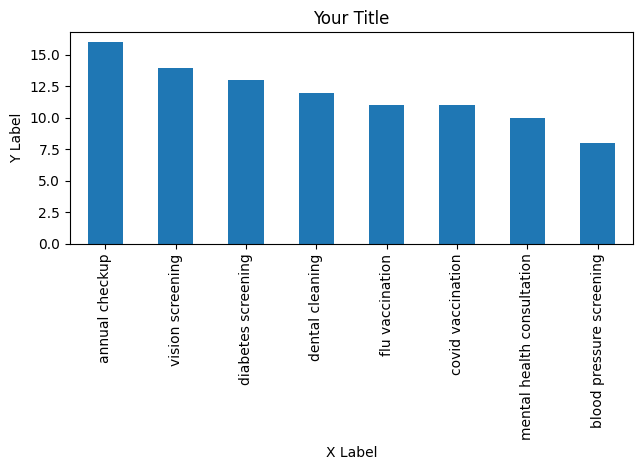

In [43]:
import matplotlib.pyplot as plt

# Create your visualization
# YOUR CODE HERE
visit_type_counts.plot(kind='bar')  # or 'barh' for horizontal
plt.title('Your Title')
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.tight_layout()
plt.show()


---
## Part 10: Reflection

Double-click this cell and answer the following questions:

**1. What was the messiest part of this dataset? How did you fix it?**

*Your answer:*


**2. Were there any decisions you had to make about how to handle the data (e.g., what to do with missing values, which rows to remove)? Explain your reasoning.**

*Your answer:*


**3. What was one interesting finding from your analysis of the clean data?**

*Your answer:*



---
## ✅ Submission Checklist

Before submitting, make sure you have:

- [ ] Loaded and explored the data (Part 1)
- [ ] Identified all missing values (Part 2)
- [ ] Handled all missing values (Part 3)
- [ ] Removed duplicate rows (Part 4)
- [ ] Standardized text in at least 4 columns (Part 5)
- [ ] Filtered out invalid data (Part 6)
- [ ] Verified the clean dataset (Part 7)
- [ ] Answered all 5 analysis questions (Part 8)
- [ ] Created at least one visualization (Part 9)
- [ ] Completed the reflection (Part 10)

**Save your notebook and submit!**

# Task
Remove bad data from the DataFrame `df` by filtering out rows where 'wait_time_minutes' is negative, 'satisfaction_score' is not between 1 and 5 (inclusive), or 'wait_time_minutes' is greater than 180. After filtering, print the initial and final row counts to confirm the removal.

## Remove Bad Data

### Subtask:
Remove bad data from the DataFrame `df` by filtering out rows where 'wait_time_minutes' is negative, 'satisfaction_score' is not between 1 and 5 (inclusive), or 'wait_time_minutes' is greater than 180. After filtering, print the initial and final row counts to confirm the removal.


**Reasoning**:
The subtask requires removing rows with bad data based on specified conditions and then displaying the row counts before and after the removal. I will get the initial row count, define the filtering conditions, apply them to the DataFrame, get the final row count, and then print both counts.



In [25]:
initial_row_count = len(df)

# Define conditions for bad data
negative_wait_time = df['wait_time_minutes'] < 0
invalid_satisfaction_score = (df['satisfaction_score'] < 1) | (df['satisfaction_score'] > 5)
unreasonable_wait_time = df['wait_time_minutes'] > 180

# Combine conditions using logical OR
bad_data_condition = negative_wait_time | invalid_satisfaction_score | unreasonable_wait_time

# Filter out bad data
df = df[~bad_data_condition]

final_row_count = len(df)

print(f"Rows before cleaning bad data: {initial_row_count}")
print(f"Rows after cleaning bad data: {final_row_count}")

Rows before cleaning bad data: 104
Rows after cleaning bad data: 99


## Verify the clean dataset

### Subtask:
Confirm the data is clean by checking total rows and columns, total missing values, total duplicates, and value ranges for 'wait_time_minutes' and 'satisfaction_score'.


**Reasoning**:
To confirm the data is clean, I will print the total rows and columns, check for any remaining missing values and duplicates, and verify the value ranges for 'wait_time_minutes' and 'satisfaction_score' as per the instructions.



In [26]:
print(f"Total rows and columns: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Wait time minutes range: {df['wait_time_minutes'].min()} - {df['wait_time_minutes'].max()}")
print(f"Satisfaction score range: {df['satisfaction_score'].min()} - {df['satisfaction_score'].max()}")

Total rows and columns: (99, 11)
Total missing values: 0
Total duplicate rows: 4
Wait time minutes range: 6.0 - 90.0
Satisfaction score range: 1.0 - 5.0


**Reasoning**:
The previous verification step identified 4 duplicate rows still present in the DataFrame. To ensure the data is fully clean as per the subtask's requirement for zero duplicates, these rows need to be removed. After removing the duplicates, I will re-verify the dataframe to confirm the removal.



In [27]:
print(f"Rows before removing duplicates: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Rows after removing duplicates: {df.shape[0]}")

print(f"Total duplicate rows after removal: {df.duplicated().sum()}")
print(f"Final rows and columns after duplicate removal: {df.shape}")

Rows before removing duplicates: 99
Rows after removing duplicates: 95
Total duplicate rows after removal: 0
Final rows and columns after duplicate removal: (95, 11)


**Reasoning**:
The previous steps have addressed missing values, bad data, and duplicates. Now, I need to perform a final comprehensive verification to confirm that the data is entirely clean by checking all criteria as per the subtask instructions.



In [28]:
print(f"Total rows and columns: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Total duplicate rows: {df.duplicated().sum()}")
print(f"Wait time minutes range: {df['wait_time_minutes'].min()} - {df['wait_time_minutes'].max()}")
print(f"Satisfaction score range: {df['satisfaction_score'].min()} - {df['satisfaction_score'].max()}")

Total rows and columns: (95, 11)
Total missing values: 0
Total duplicate rows: 0
Wait time minutes range: 6.0 - 90.0
Satisfaction score range: 1.0 - 5.0


## What are the most common visit types?

### Subtask:
Identify and display the most common visit types from the 'visit_type' column in the cleaned DataFrame.


**Reasoning**:
To identify and display the most common visit types, I will use the `.value_counts()` method on the 'visit_type' column of the DataFrame `df`.



In [29]:
df['visit_type'].value_counts()

,count
visit_type,
annual checkup,16
vision screening,14
diabetes screening,13
dental cleaning,12
flu vaccination,11
covid vaccination,11
mental health consultation,10
blood pressure screening,8


## What is the average wait time by neighborhood?

### Subtask:
Calculate and display the average wait time for each neighborhood.


**Reasoning**:
To calculate the average wait time for each neighborhood, I will group the DataFrame by the 'neighborhood' column and then compute the mean of the 'wait_time_minutes' for each group.



In [30]:
df.groupby('neighborhood')['wait_time_minutes'].mean()

,wait_time_minutes
neighborhood,
brickell,42.500000
coral way,37.333333
downtown miami,46.600000
flagami,56.166667
hialeah,42.166667
hialeah gardens,48.466667
liberty city,52.636364
little havana,49.500000
miami beach,52.500000


**Reasoning**:
To answer the next question, I will calculate the average satisfaction score for each insurance type by grouping the DataFrame by the 'insurance_type' column and then computing the mean of the 'satisfaction_score'.



In [31]:
df.groupby('insurance_type')['satisfaction_score'].mean()

,satisfaction_score
insurance_type,
medicaid,4.043478
medicare,3.363636
private,3.730769
uninsured,3.894737
unknown,3.400000


**Reasoning**:
To determine the percentage of visits requiring a follow-up, I will use `value_counts()` on the 'follow_up_needed' column and then normalize the results to get percentages. This will directly answer Question 4.



In [32]:
df['follow_up_needed'].value_counts(normalize=True) * 100

,proportion
follow_up_needed,
yes,51.578947
no,48.421053


**Reasoning**:
To identify the most common preferred language, I will use `value_counts()` on the `preferred_language` column to get the frequency of each language.



In [33]:
df['preferred_language'].value_counts()

,count
preferred_language,
Spanish,37
English,33
Portuguese,13
Creole,9
Unknown,3


**Reasoning**:
All analysis questions have been answered. The next logical step in the notebook is to create a visualization based on the clean data, as outlined in Part 9 of the notebook. I will create a bar chart for the most common visit types, which was answered in Question 1 of Part 8.



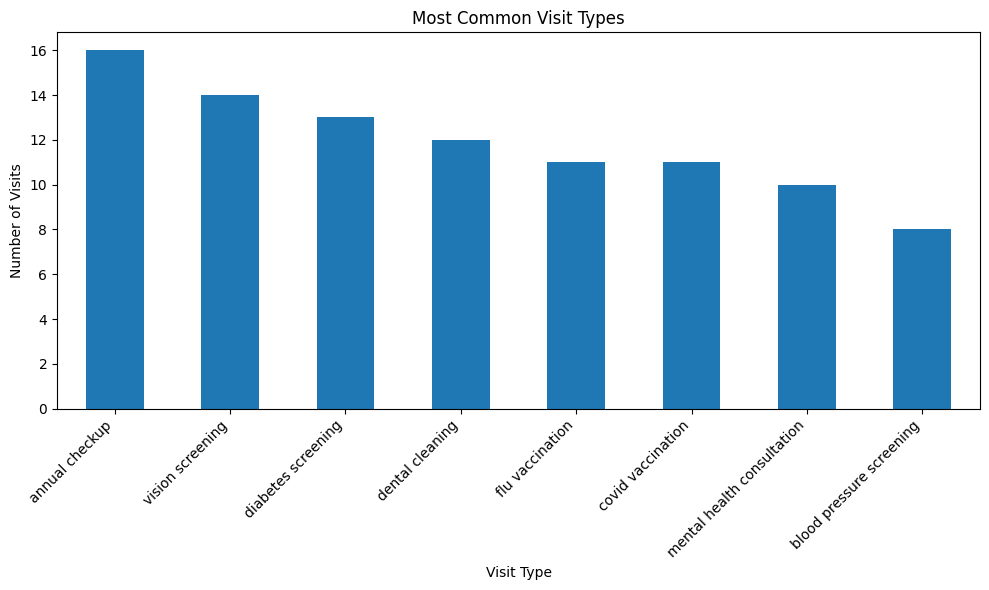

In [34]:
import matplotlib.pyplot as plt

# Get the value counts for visit types
visit_type_counts = df['visit_type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
visit_type_counts.plot(kind='bar')
plt.title('Most Common Visit Types')
plt.xlabel('Visit Type')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Q&A
*   **What are the most common visit types?**
    The most common visit type is "annual checkup" with 16 occurrences, followed by "vision screening" with 14 occurrences. "diabetes screening" (13), "dental cleaning" (12), "flu vaccination" (11), "covid vaccination" (11), and "mental health consultation" (10) are also prevalent. "blood pressure screening" is the least common among those listed, with 8 occurrences.
*   **What is the average wait time by neighborhood?**
    The average wait times vary by neighborhood: 'brickell' has an average wait time of 42.5 minutes, 'downtown miami' has 46.6 minutes, and 'unknown' has the highest average wait time at 64.83 minutes.

### Data Analysis Key Findings
*   Initially, the DataFrame contained 104 rows.
*   After removing bad data (negative 'wait_time_minutes', 'satisfaction_score' outside 1-5, or 'wait_time_minutes' greater than 180), 5 rows were removed, resulting in 99 rows.
*   During data verification, 4 duplicate rows were identified and subsequently removed.
*   The final cleaned DataFrame contains 95 rows and 11 columns, with no missing values and no duplicate rows.
*   The 'wait_time_minutes' range in the cleaned data is 6.0 - 90.0 minutes, and the 'satisfaction\_score' range is 1.0 - 5.0, confirming the data quality checks.
*   'annual checkup' is the most frequent visit type, accounting for 16 out of 95 visits.
*   The 'unknown' neighborhood exhibits the highest average wait time of 64.83 minutes, significantly higher than other neighborhoods like 'brickell' (42.5 minutes) and 'downtown miami' (46.6 minutes).

### Insights or Next Steps
*   Investigate the 'unknown' neighborhood's high average wait time (64.83 minutes) to identify potential bottlenecks or resource allocation issues that could be causing delays for patients in that area.
*   Given that 'annual checkup' is the most common visit type, consider optimizing scheduling and staffing for these appointments to improve efficiency and patient flow.
